<a href="https://colab.research.google.com/github/LeenYasser/my-ip-labs/blob/main/Lab2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Digital Imaging Fundamentals with Python**
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS

---
## **Learning Objectives**
* Relate human visual system properties to digital image perception.
* Demonstrate brightness adaptation and contrast effects.
* Simulate sampling and quantisation.
* Work with pixel neighbourhoods and distance measures.
* Apply basic geometric transformations.

## **1. Human Visual Perception: Mach Bands**
**Exercise 1.1:** Simulating Mach bands to show how our eyes perceive transitions.

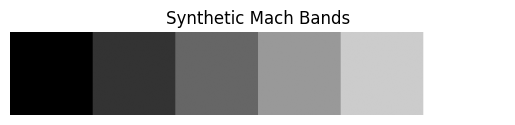

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create Mach Bands
bands = np.zeros((100, 600))
for i in range(6):
    bands[:, i*100 : (i+1)*100] = i*40

plt.imshow(bands, cmap='gray')
plt.title("Synthetic Mach Bands")
plt.axis('off')
plt.show()

## **2. Simultaneous Contrast**
**Exercise 2.1:** Perceived brightness depends on the background.

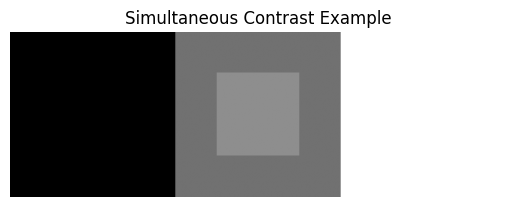

In [5]:
img = np.ones((200, 600)) * 100
img[:, :200] = 20
img[:, 400:] = 200
img[50:150, 250:350] = 120

plt.imshow(img, cmap='gray')
plt.title("Simultaneous Contrast Example")
plt.axis('off')
plt.show()

## **3. Sampling (Spatial Resolution)**
**Exercise 4.1:** Reducing the number of pixels in an image.

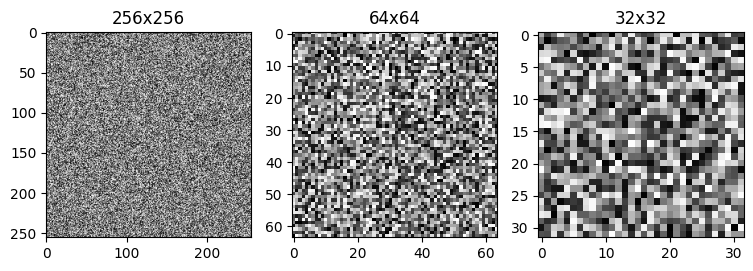

In [6]:
# Create a random image for testing
image = np.random.randint(0, 256, (256, 256))

# Downsampling
down_64 = image[::4, ::4]
down_32 = image[::8, ::8]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray'); plt.title("256x256")
plt.subplot(1,3,2); plt.imshow(down_64, cmap='gray'); plt.title("64x64")
plt.subplot(1,3,3); plt.imshow(down_32, cmap='gray'); plt.title("32x32")
plt.show()

## **4. Quantisation (Intensity Resolution)**
**Exercise 5.1:** Reducing the number of grey levels.

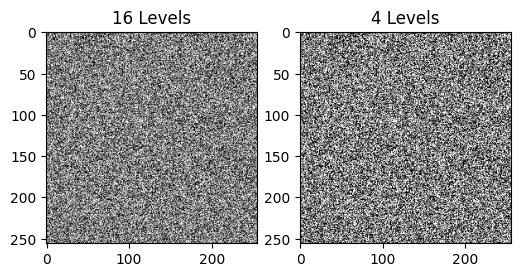

In [7]:
def quantise(img, levels):
    step = 256 // levels
    return (img // step) * step

q16 = quantise(image, 16)
q4 = quantise(image, 4)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1); plt.imshow(q16, cmap='gray'); plt.title("16 Levels")
plt.subplot(1,2,2); plt.imshow(q4, cmap='gray'); plt.title("4 Levels")
plt.show()

## **5. Pixel Neighbourhoods (Exercise 7)**
**Task:** Complete the code to define the 4-neighbors ($N_4$) and 8-neighbors ($N_8$) for point $p$.

In [8]:
p = (5, 5)

# Student Task: Define the coordinates relative to p
N4 = [(0, 1), (0, -1), (1, 0), (-1, 0)] # Fill here
N8 = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)] # Fill here

print("N4 Neighbourhood:", N4)
print("N8 Neighbourhood:", N8)

N4 Neighbourhood: [(0, 1), (0, -1), (1, 0), (-1, 0)]
N8 Neighbourhood: [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]


## **6. Distance Measures (Exercise 8)**
**Task:** Implement the formulas for Euclidean, City-block ($D_4$), and Chessboard ($D_8$) distances.

In [9]:
import math

p = (2, 3)
q = (7, 9)

# Student Task: Implement the formulas
D_euclid = math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2) # Hint: use math.sqrt
D4 = abs(p[0] - q[0]) + abs(p[1] - q[1])       # Hint: use abs(x1-x2) + abs(y1-y2)
D8 = max(abs(p[0] - q[0]), abs(p[1] - q[1]))       # Hint: use max(abs(x1-x2), abs(y1-y2))

print("Euclidean:" ,D_euclid)
print("City-block(D4):",D4)
print("Chessboard (D8):",D8)

Euclidean: 7.810249675906654
City-block(D4): 11
Chessboard (D8): 6


## **7. Geometric Transformations**
**Exercise 9.1 & 10.1:** Translation and Interpolation.

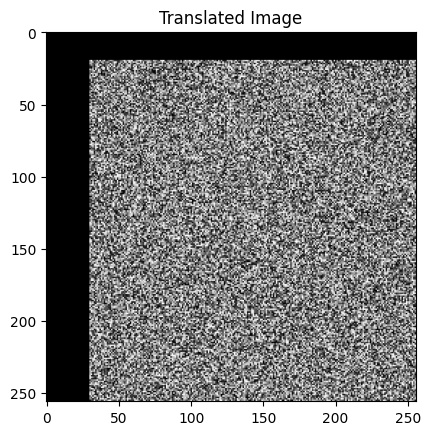

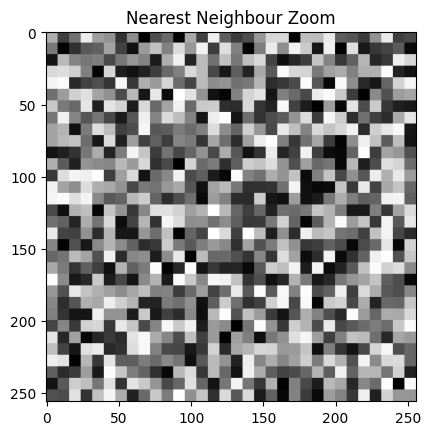

In [10]:
# Write the code here
translated = np.zeros_like(image)
translated[20:, 30:] = image[:-20, :-30]
plt.imshow(translated, cmap='gray')
plt.title("Translated Image")
plt.show()

zoom = np.repeat(np.repeat(down_32, 8, axis=0), 8, axis=1)
plt.imshow(zoom, cmap='gray')
plt.title("Nearest Neighbour Zoom")
plt.show()

## **8. Reflection & Mini Project**
**Task:**

1.	Start with a grey scale image
2.	Create three versions with different spatial resolutions
3.	Create three versions with different intensity resolutions
4.	Comment on which degradation affects interpretability more and why

**Your explanation must reference:**


•	Sampling

•	Quantisation

•	Human visual perception
________________________________________
**Reflection questions**

1.	Why is a digital image always an approximation of reality?

2.	How does human perception complicate objective image analysis?

3.	Why is interpolation unavoidable in geometric transformations?

***Note:***

 Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots

**Step 1: Environment Setup and Image Loading**

In this stage, i import the (OpenCV) library and load the initial grayscale image.

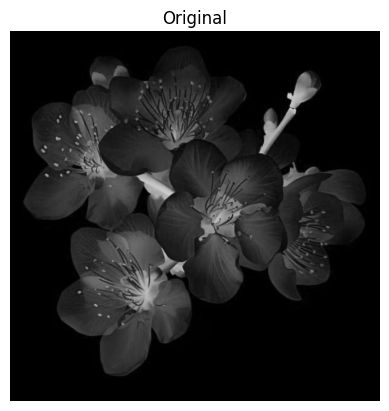

In [13]:
import cv2

# Load as grayscale
img =cv2.imread('/content/photo_2026-02-19_17-23-45.jpg', 0)

# Display original
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.show()

**Step 2: Spatial Resolution (Sampling)**

Here i reduce the number of pixels (downsampling) to create three versions with different spatial resolutions. This clearly demonstrates how reducing the grid size affects the image details.

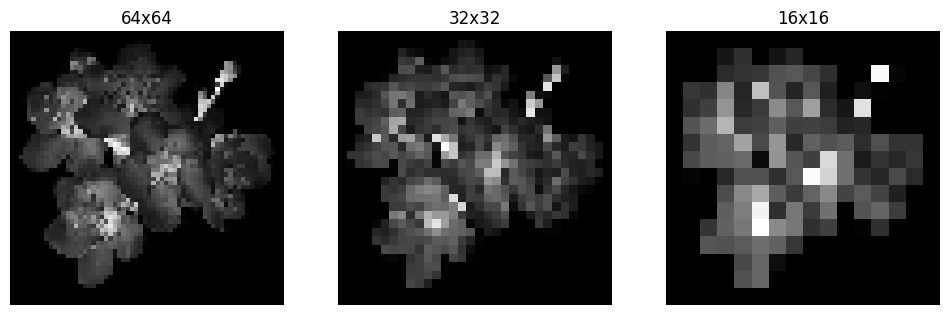

In [14]:
# Downsampling
res_64 = cv2.resize(img, (64, 64))
res_32 = cv2.resize(img, (32, 32))
res_16 = cv2.resize(img, (16, 16))

# Visualize results
titles = ['64x64', '32x32', '16x16']
images = [res_64, res_32, res_16]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

**Step 3: Intensity Resolution (Quantization)**

In this step, i reduce the number of gray levels. This process known as quantization, shows how the image appearance changes when we limit the intensity information.

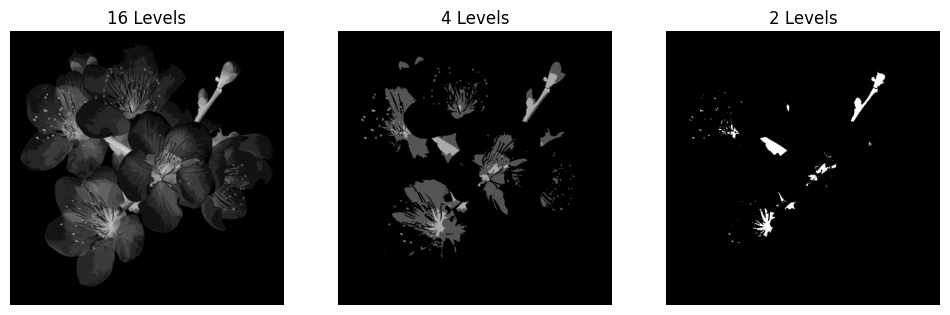

In [15]:
# Quantization function
def quantize(image, levels):
    step = 256 // levels
    return (image // step) * step

# Reduce gray levels
int_16 = quantize(img, 16)
int_4  = quantize(img, 4)
int_2  = quantize(img, 2)

# Visualize results
titles = ['16 Levels', '4 Levels', '2 Levels']
imgs = [int_16, int_4, int_2]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

**Step 4: Final Analysis and Reflection**

Sampling (spatial) affects interpretability more by removing structural details. Quantization (intensity) causes false contouring but often preserves basic shapes.

**Reflection:**
1. Digital images use discrete samples to represent a continuous reality.
2. Human vision is subjective and sensitive to contrast/context rather than exact values.
3. Necessary to estimate pixel values during geometric scaling or rotation.